# Data

In [1]:
import pandas as pd 
import sys
import os
current_dir = os.getcwd() 
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.dataset import SeqDataset

In [2]:
data_path = '../data/ArchiveII_max_length_128.csv'
df = pd.read_csv(data_path)
df

,id,sequence,structure,base_pairs,len,fam
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115,5s
2,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75,tRNA
3,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128,5s
4,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111,srp
...,...,...,...,...,...,...
2315,5s_Pseudomonas-stutzeri-2,GCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAAC...,(((((((((.....((((((((.....((((((................,"[[1, 119], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s
2316,5s_Bacillus-cereus-6,UGGUAAUGAUGGCAGAGAGGUCACACCCGUUCCCAUACCGAACACG...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",114,5s
2317,srp_Myco.aviu._AE016958,GGGGACCCCGCGCACCCGACAGAGCCCGUUGACCCUUGCUGCCUUC...,((((.....(.(...(.(.....(.(....).).....).).).)....,"[[1, 53], [2, 52], [3, 51], [4, 50], [10, 45],...",88,srp
2318,5s_Triticum-aestivum-1,GGAUGCGAUCAUACCAGCACUAAAGCACCGGAUCCCAUCAGAACUC...,(((((((((....(((((((......((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s


# Dataset

In [3]:
seq_ds = SeqDataset(data_path)
seq_ds[0]["contact"].shape

torch.Size([112, 112])

2320 dict_keys(['embedding', 'contact', 'contact_oh', 'outer', 'length', 'canonical_mask', 'id', 'sequence', 'interaction_prior'])


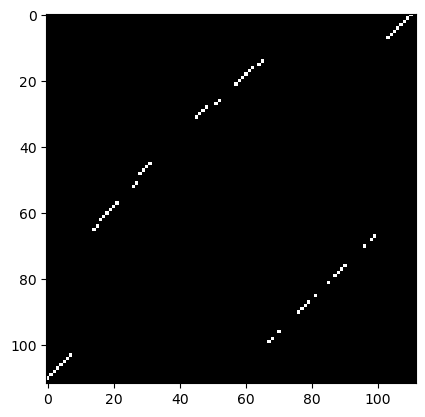

In [4]:
import numpy as np
import matplotlib.pyplot as plt

seq_ds = SeqDataset(data_path)
print(len(seq_ds), seq_ds[0].keys())
ct = np.array(seq_ds[0]["contact"])
plt.imshow(ct, cmap="gray")

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

def plot_contact(x):
    seq_ds = SeqDataset(data_path)
    ct = np.array(seq_ds[x]["contact"])
    mask = np.zeros([512,512])
    mask[:ct.shape[0],:ct.shape[1]] = ct
    plt.imshow(mask, cmap="gray")
    
interact(
    plot_contact,
    x=widgets.IntSlider(min=0, max=3863, step=1, value=0, description="seq")
)

interactive(children=(IntSlider(value=0, description='seq', max=3863), Output()), _dom_classes=('widget-intera…

<function __main__.plot_contact(x)>

In [6]:
ct_filter_128 = [
    np.array(seq_ds[i]["contact"]) 
    for i in range(len(seq_ds)) 
    if seq_ds[i]["length"] <= 128
]

print(len(ct_filter_128))


2320


In [7]:

def plot_contact(x):
    seq_ds = SeqDataset(data_path)
    ct = ct_filter_128[x]
    mask = np.zeros([128,128])
    mask[:ct.shape[0],:ct.shape[1]] = ct
    plt.imshow(mask, cmap="gray")
    
# Slider
slider = widgets.IntSlider(min=0, max=len(ct_filter_128), step=1, value=0, description="seq")
# Botón de play
play = widgets.Play(
    value=0,
    min=0,
    max=len(ct_filter_128),
    step=1,
    interval=1000,  # milisegundos entre pasos
    description="Press play",
    disabled=False
)

# Sincronizar play con slider
widgets.jslink((play, 'value'), (slider, 'value'))

# Mostrar
ui = widgets.HBox([play, slider])
out = widgets.interactive_output(plot_contact, {'x': slider})

display(ui, out)


Output()

In [8]:
conns = ct_filter_128[0].sum() 
shape = ct_filter_128[0].shape[0]**2
print(conns)
print(shape)
print(conns/shape) 

60.0
12544
0.0047831632653061226


In [9]:
120/14400


0.008333333333333333

In [10]:
119/120

0.9916666666666667

$$len=120$$
$$\#CT=60$$
$$CTmatrix=len^{2}=14400$$
Connections rate:

$$CTmatRatio1=\frac{2*\#CT}{CTmatrix}=\frac{120}{120^{2}}=\frac{1}{120}=0.0083$$
$$CTmatRatio0=1-CTmatRatio1=\frac{119}{120}=0.991$$

0.0056025228


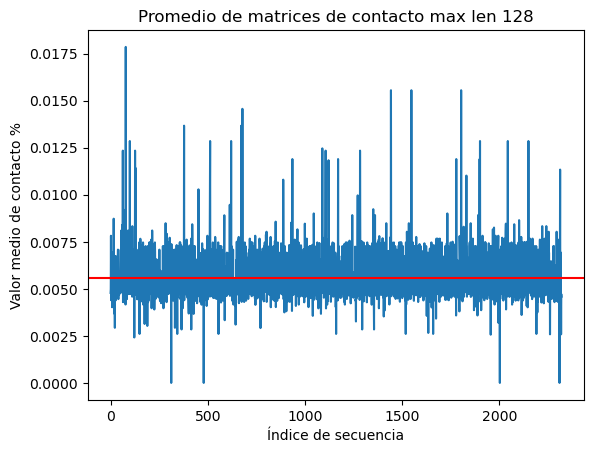

In [11]:
id = np.arange(0, len(ct_filter_128))
means = np.array([ct_filter_128[i].mean() for i in id])
print(means.mean())

plt.plot(id, means)
plt.axhline(y=means.mean(), color="red")

plt.xlabel("Índice de secuencia")
plt.ylabel("Valor medio de contacto %")
plt.title("Promedio de matrices de contacto max len 128")
plt.show()


# PROCESO DIFUSIVO 

## scheduler

In [12]:
def get_beta_schedule(timesteps):
    betas = np.linspace(0.0001, 0.01, timesteps)
    return betas

T = 2000 # El número de pasos de difusión
betas = get_beta_schedule(T)
alphas = 1 - betas
alphas_bar = np.cumprod(alphas)



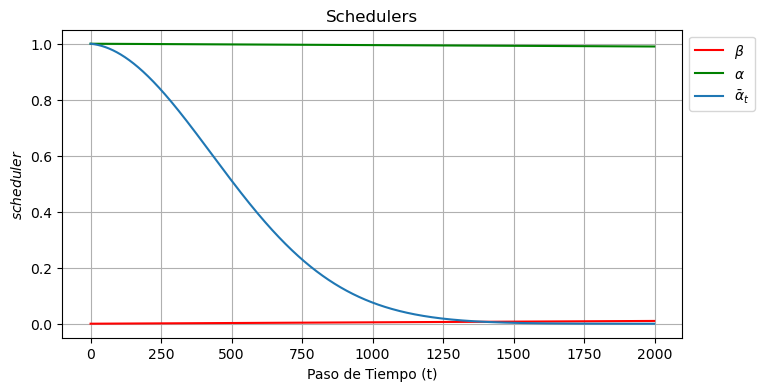

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(betas, color="red", label=r"$\beta$")
plt.plot(alphas, color="green", label=r"$\alpha$")
plt.plot(alphas_bar, label=r"$\bar{\alpha}_t$")
plt.title('Schedulers')
plt.xlabel("Paso de Tiempo (t)")
plt.ylabel(r"$scheduler$")
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()  

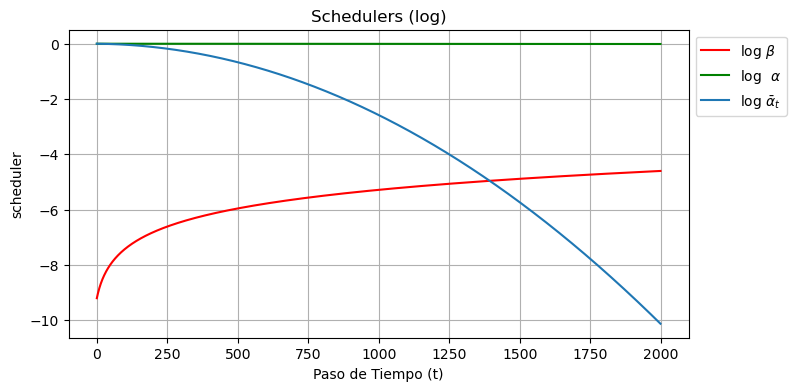

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(np.log(betas), color="red", label=r"log $\beta$")
plt.plot(np.log(alphas), color="green", label=r"log  $\alpha$")
plt.plot(np.log(alphas_bar), label=r"log $\bar{\alpha}_t$")
plt.title('Schedulers (log)')
plt.xlabel("Paso de Tiempo (t)")
plt.ylabel(r"scheduler")
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()  

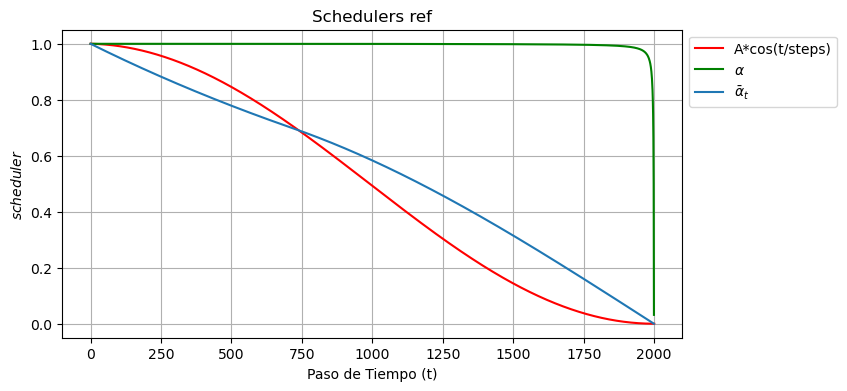

In [15]:
import torch
def beta_schedule(num_steps, schedule_name='cosine', s=0.01):
    """
    cosine schedule
    as proposed in https://openreview.net/forum?id=-NEXDKk8gZ
    """
    t = torch.arange(0, num_steps + 1, dtype=torch.float64)
    if schedule_name == 'cosine':
        f_t = torch.cos(((t / num_steps) + s) / (1 + s) * np.pi * 0.5) ** 2
    elif schedule_name == 'sqrt':
        f_t = 1 - torch.sqrt(t / num_steps + 0.0001)
    else:
        raise NotImplementedError(f"unknown beta schedule: {schedule_name}")
    alpha_bars = f_t / f_t[0]
    alphas = (alpha_bars[1:] / alpha_bars[:-1])
    alphas = torch.clamp(alphas, min=0.001, max=0.999)

    # Use sqrt of this, so the alpha in our paper is the alpha_sqrt from the
    # Gaussian diffusion in Ho et al.
    alphas = torch.sqrt(alphas)
    return alphas, f_t

alphas , f_t = beta_schedule(2000)
alphas_bar = torch.cumprod(alphas,  dim=0)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(f_t, color="red", label=r"A*cos(t/steps)")
plt.plot(alphas, color="green", label=r"$\alpha$")
plt.plot(alphas_bar, label=r"$\bar{\alpha}_t$")
plt.title('Schedulers ref')
plt.xlabel("Paso de Tiempo (t)")
plt.ylabel(r"$scheduler$")
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()  

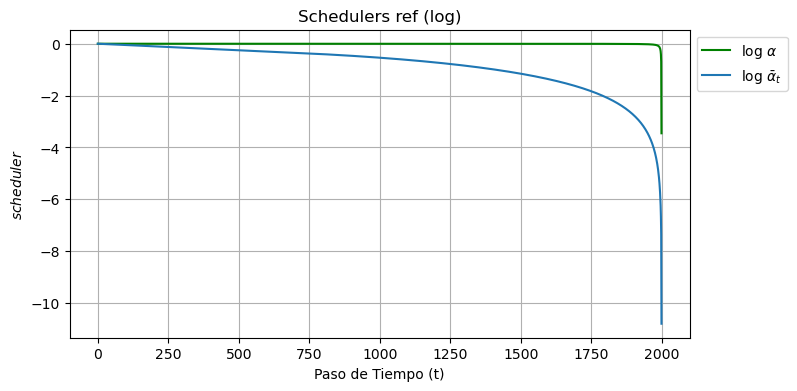

In [16]:
alphas, tf = beta_schedule(2000)

log_alphas = torch.log(alphas)
log_alpha_bars = torch.cumsum(log_alphas, dim=0)



plt.figure(figsize=(8, 4))
plt.plot(log_alphas, color="green", label=r"log $\alpha$")
plt.plot(log_alpha_bars, label=r"log $\bar{\alpha}_t$")
plt.title('Schedulers ref (log)')
plt.xlabel("Paso de Tiempo (t)")
plt.ylabel(r"$scheduler$")
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()  

## extract

In [17]:
# --------------------------------------------------
# La función (usando métodos de torch)
# --------------------------------------------------
def extract(a, t, x_shape):
    """
    Extrae valores de 'a' en los índices 't' y los reforma
    para hacer broadcasting con 'x_shape'.
    """
    # b es el tamaño del batch
    b, *_ = t.shape
    
    # .gather() selecciona elementos de 'a' (dim -1) usando los índices 't'
    out = a.gather(-1, t)
    
    # Remodela 'out' para que sea (b, 1, 1, 1)
    # len(x_shape) - 1 es 3, entonces (1,) * 3 es (1, 1, 1)
    return out.reshape(b, *((1,) * (len(x_shape) - 1)))


In [18]:

# --------------------------------------------------
# 1. Definir nuestros parámetros
# --------------------------------------------------

# a: El "schedule" (10 timesteps)
# Imaginemos que 'a' es el schedule de "betas" (cantidad de ruido)
# Creamos 10 valores de ejemplo
a = torch.linspace(0.001, 0.02, 10) # 10 valores, de 0.001 a 0.02

# x_shape: La forma de nuestro batch de imágenes
batch_size = 4
channels = 1   # Asumimos RGB
height = 6
width = 6
x_shape = (batch_size, channels, height, width) # (4, 3, 32, 32)

# t: Los timesteps elegidos para este batch (Batch size = 4)
# 4 índices aleatorios entre 0 y 9 (porque hay 10 steps, 0-9)
t = torch.tensor([5, 0, 9, 2]) # 4 índices

# --------------------------------------------------
# 2. Ejecutar la función
# --------------------------------------------------
extracted_values = extract(a, t, x_shape)

# --------------------------------------------------
# 3. Ver los resultados
# --------------------------------------------------
print(f"Schedule 'a' (10 pasos):")
print(a)
print(f"Forma de 'a': {a.shape}\n a: ")

print(f"Timesteps 't' (índices para el batch):")
print(t)
print(f"Forma de 't': {t.shape}\n")

print(f"Forma de las imágenes 'x_shape': {x_shape}\n")

print(f"--- Resultado de extract() ---")
print(f"Valores extraídos (reformados):")
print(extracted_values)
print(f"\nForma final de salida: {extracted_values.shape}")


Schedule 'a' (10 pasos):
tensor([0.0010, 0.0031, 0.0052, 0.0073, 0.0094, 0.0116, 0.0137, 0.0158, 0.0179,
        0.0200])
Forma de 'a': torch.Size([10])
 a: 
Timesteps 't' (índices para el batch):
tensor([5, 0, 9, 2])
Forma de 't': torch.Size([4])

Forma de las imágenes 'x_shape': (4, 1, 6, 6)

--- Resultado de extract() ---
Valores extraídos (reformados):
tensor([[[[0.0116]]],


        [[[0.0010]]],


        [[[0.0200]]],


        [[[0.0052]]]])

Forma final de salida: torch.Size([4, 1, 1, 1])


In [19]:

# --------------------------------------------------
# 4. Demostración del Broadcasting
# --------------------------------------------------
print("\n--- Demostración de por qué se reforma ---")
# Creamos un batch de imágenes falsas (solo ruido)
x_images = torch.ones(x_shape) # (4, 3, 32, 32)

# Podemos multiplicar el batch de imágenes por los valores extraídos
# (4, 3, 32, 32) * (4, 1, 1, 1) -> (4, 3, 32, 32)
# PyTorch aplica el 1er valor a la 1ra imagen, el 2do a la 2da, etc.
result = x_images * extracted_values

print(f"Forma de imágenes 'x': {x_images.shape}")
print(f"Forma de valores 'out': {extracted_values.shape}")
print(f"Forma del resultado (x * out): {result.shape}")
print("\n¡Funciona! Cada imagen [i] fue multiplicada por su valor [i].")


--- Demostración de por qué se reforma ---
Forma de imágenes 'x': torch.Size([4, 1, 6, 6])
Forma de valores 'out': torch.Size([4, 1, 1, 1])
Forma del resultado (x * out): torch.Size([4, 1, 6, 6])

¡Funciona! Cada imagen [i] fue multiplicada por su valor [i].


In [20]:


print(f"x_images[0, :, :, :] (imagen 0):\n {x_images[0, :, :, :]}\n")
print(f"result[0, :, :, :] (resultado imagen 0):\n {result[0, :, :, :]}\n")

print(f"x_images[1, :, :, :] (imagen 1):\n {x_images[1, :, :, :]}\n")
print(f"result[1, :, :, :] (resultado imagen 1):\n {result[1, :, :, :]}\n")

x_images[0, :, :, :] (imagen 0):
 tensor([[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]])

result[0, :, :, :] (resultado imagen 0):
 tensor([[[0.0116, 0.0116, 0.0116, 0.0116, 0.0116, 0.0116],
         [0.0116, 0.0116, 0.0116, 0.0116, 0.0116, 0.0116],
         [0.0116, 0.0116, 0.0116, 0.0116, 0.0116, 0.0116],
         [0.0116, 0.0116, 0.0116, 0.0116, 0.0116, 0.0116],
         [0.0116, 0.0116, 0.0116, 0.0116, 0.0116, 0.0116],
         [0.0116, 0.0116, 0.0116, 0.0116, 0.0116, 0.0116]]])

x_images[1, :, :, :] (imagen 1):
 tensor([[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]])

result[1, :, :, :] (resultado imagen 1):
 tensor([[[0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010],
      

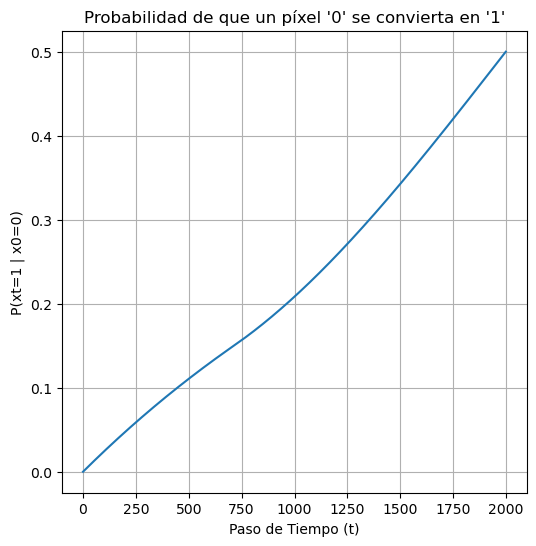

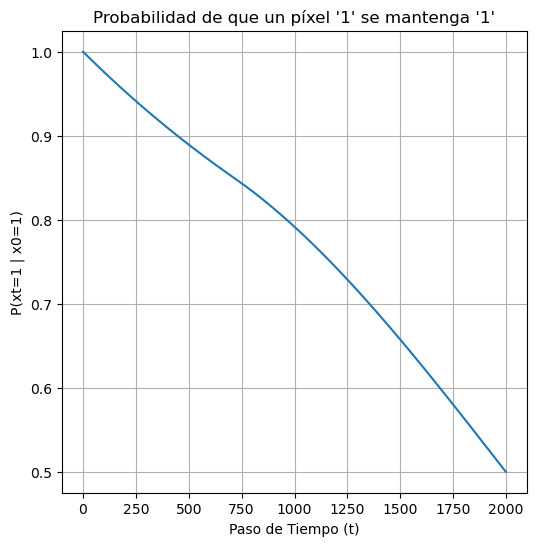

In [21]:
t_values = np.arange(T)
prob_to_1_from_0 = (1 - alphas_bar[t_values]) * 0.5

plt.figure(figsize=(6, 6))
plt.plot(t_values, prob_to_1_from_0)
plt.title("Probabilidad de que un píxel '0' se convierta en '1'")
plt.xlabel("Paso de Tiempo (t)")
plt.ylabel("P(xt=1 | x0=0)")
plt.grid(True)
plt.show()

prob_to_1_from_1 = alphas_bar[t_values] * 1.0 + (1 - alphas_bar[t_values]) * 0.5

plt.figure(figsize=(6, 6))
plt.plot(t_values, prob_to_1_from_1)
plt.title("Probabilidad de que un píxel '1' se mantenga '1'")
plt.xlabel("Paso de Tiempo (t)")
plt.ylabel("P(xt=1 | x0=1)")
plt.grid(True)
plt.show()

In [22]:
import torch
import torch.nn.functional as F

def forward_diffusion_sample(x0, t, alphas_bar, K=2):
    """
    Realiza una transición de un solo paso desde x0 a xt.
    x0: el tensor del mapa de contacto original (np.array).
    t: el paso de tiempo.
    alphas_bar: el producto acumulado de 1 - beta.
    K: número de categorías (2 para mapas de contacto).
    """
    # 1. Aplanar el contact map 
    x0_tensor = x0.long().flatten()

    # 2. Convertir el tensor a one-hot encoding
    x0_one_hot = F.one_hot(x0_tensor, num_classes=K).float()

    # 3. Obtener el alpha_bar para el paso de tiempo actual
    alpha_bar_t = alphas_bar[t]

    # 4. Crear un tensor de la distribución uniforme
    uniform_prob = torch.ones_like(x0_one_hot) * (1 / K)

    # 5. Calcular la probabilidad de transición para cada píxel
    prob_t = alpha_bar_t * x0_one_hot + (1 - alpha_bar_t) * uniform_prob

    # 6. Muestrear de la distribución categórica para obtener xt
    # xt_flat contendrá los nuevos valores (0 o 1) para cada píxel
    xt_flat = torch.multinomial(prob_t, num_samples=1).squeeze(-1)
    
    return x0_tensor,x0_one_hot,alpha_bar_t, uniform_prob, xt_flat

In [23]:
import torch
import torch.nn.functional as F
import numpy as np

def forward_diffusion_sample(x0, t, alphas_bar, K=2):
    """
    Realiza una transición de un solo paso desde x0 a xt.
    x0: el tensor del mapa de contacto original (np.array).
    t: el paso de tiempo.
    alphas_bar: el producto acumulado de 1 - beta.
    K: número de categorías (2 para mapas de contacto).
    """
    print(f"--- Paso de Corrupción para t = {t} ---")
    
    # 1. Convertir el array de numpy a un tensor de PyTorch y aplanarlo
    # Se corrige la conversión para que funcione con el input np.array
    print(f"Forma original de x0 (np.array): {x0.shape}")
    x0_tensor = x0.long().flatten()
    print(f"Forma del tensor aplanado: {x0_tensor.shape}")

    # 2. Convertir el tensor a one-hot encoding
    x0_one_hot = F.one_hot(x0_tensor, num_classes=K).float()
    print(f"Forma del tensor one-hot: {x0_one_hot.shape}")
    
    # Visualización del one-hot encoding para los primeros 5 píxeles
    print("\nVisualización de one-hot encoding (primeros 5 píxeles):")
    for i in range(100,112):
        print(f"Píxel {i}: {x0_tensor[i].item()} -> {x0_one_hot[i].numpy()}")

    # 3. Obtener el alpha_bar para el paso de tiempo actual
    alpha_bar_t = alphas_bar[t]
    print(f"\nValor de alpha_bar_t en el paso {t}: {alpha_bar_t:.4f}")

    # 4. Crear un tensor de la distribución uniforme
    uniform_prob = torch.ones_like(x0_one_hot) * (1 / K)

    # 5. Calcular la probabilidad de transición para cada píxel
    prob_t = alpha_bar_t * x0_one_hot + (1 - alpha_bar_t) * uniform_prob
    print(f"\nForma del tensor de probabilidades prob_t: {prob_t.shape}")
    
    # Visualización de la distribución de probabilidades para el primer píxel
    sample_pixel_original_value = x0_tensor[0].item()
    sample_pixel_prob_dist = prob_t[0]
    
    print(f"Probabilidades de transición para el primer píxel (x0 = {sample_pixel_original_value}):")
    print(f"P(x_t=0 | x_0) = {sample_pixel_prob_dist[0].item():.4f}")
    print(f"P(x_t=1 | x_0) = {sample_pixel_prob_dist[1].item():.4f}")

    # 6. Muestrear de la distribución categórica para obtener xt
    xt_flat = torch.multinomial(prob_t, num_samples=1).squeeze(-1)
    print(f"\nForma del tensor de salida xt_flat: {xt_flat.shape}")
    print(f"Muestra de xt_flat (primeros 5 píxeles): {xt_flat[:5].numpy()}")
    
    return xt_flat

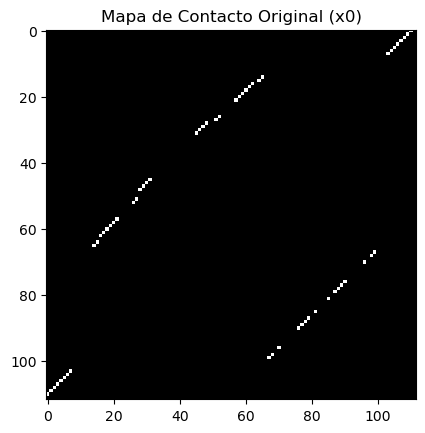

In [24]:
plt.figure()
plt.title("Mapa de Contacto Original (x0)")
plt.imshow(ct_filter_128[0], cmap="gray")
plt.show()

In [25]:
import torch
import torch.nn.functional as F
import numpy as np

def forward_diffusion_sample(x0, t, alphas_bar, K=2):
    """
    Realiza una transición de un solo paso desde x0 a xt.
    x0: el tensor del mapa de contacto original (np.array).
    t: el paso de tiempo.
    alphas_bar: el producto acumulado de 1 - beta.
    K: número de categorías (2 para mapas de contacto).
    """
    print(f"--- Paso de Corrupción para t = {t} ---")
    
    # 1. Convertir el array de numpy a un tensor de PyTorch y aplanarlo
    # Se corrige la conversión para que funcione con el input np.array
    print(f"Forma original de x0 (np.array): {x0.shape}")
    x0_tensor = x0.long().flatten()
    print(f"Forma del tensor aplanado: {x0_tensor.shape}")

    # 2. Convertir el tensor a one-hot encoding
    x0_one_hot = F.one_hot(x0_tensor, num_classes=K).float()
    print(f"Forma del tensor one-hot: {x0_one_hot.shape}")
    
    # Visualización del one-hot encoding para los primeros 5 píxeles
    print("\nVisualización de one-hot encoding (primeros 5 píxeles):")
    for i in range(1,5):
        print(f"Píxel {i}: {x0_tensor[-i].item()} -> {x0_one_hot[-i].numpy()}")

    # 3. Obtener el alpha_bar para el paso de tiempo actual
    alpha_bar_t = alphas_bar[t]
    print(f"\nValor de alpha_bar_t en el paso {t}: {alpha_bar_t:.4f}")

    # 4. Crear un tensor de la distribución uniforme
    uniform_prob = torch.ones_like(x0_one_hot) * (1 / K)
    print(f"\nForma del tensor de distribución uniforme: {uniform_prob.shape}")
    print("Distribución uniforme (ejemplo de los primeros 3 píxeles):")
    for i in range(3):
        print(f"Píxel {i}: {uniform_prob[i].numpy()}")

    # 5. Calcular la probabilidad de transición para cada píxel
    prob_t = alpha_bar_t * x0_one_hot + (1 - alpha_bar_t) * uniform_prob
    print(f"\nForma del tensor de probabilidades prob_t: {prob_t.shape}")
    
    print("prob_t", prob_t[:3])
    # Visualización de la distribución de probabilidades para el primer píxel
    sample_pixel_index = 111
    sample_pixel_original_value = x0_tensor[sample_pixel_index].item()
    sample_pixel_prob_dist = prob_t[sample_pixel_index]
    
    print(f"Probabilidades de transición para el primer píxel (x0 = {sample_pixel_original_value}):")
    print(f"P(x_t=0 | x_0) = {sample_pixel_prob_dist[0].item():.4f}")
    print(f"P(x_t=1 | x_0) = {sample_pixel_prob_dist[1].item():.4f}")

    # Visualización para un píxel con valor original diferente
    # (Suponiendo que exista un píxel con valor 1, ya que el mapa es disperso)
    try:
        sample_pixel_index_1 = (x0_tensor == 1).nonzero(as_tuple=True)
        sample_pixel_original_value_1 = x0_tensor[sample_pixel_index_1]
        sample_pixel_prob_dist_1 = prob_t[sample_pixel_index_1]
        print(f"\nProbabilidades de transición para un píxel de 'contacto' (x0 = {sample_pixel_original_value_1}):")
        print(f"P(x_t=0 | x_0) = {sample_pixel_prob_dist_1}")
        print(f"P(x_t=1 | x_0) = {sample_pixel_prob_dist_1}")
    except IndexError:
        print("\nNo se encontró un píxel de 'contacto' para visualizar.")


    # 6. Muestrear de la distribución categórica para obtener xt
    xt_flat = torch.multinomial(prob_t, num_samples=1).squeeze(-1)
    print(f"\nForma del tensor de salida xt_flat: {xt_flat.shape}")
    print(f"Muestra de xt_flat (primeros 5 píxeles): {xt_flat[:5].numpy()}")
    
    return xt_flat

--- Paso de Corrupción para t = 0 ---
Forma original de x0 (np.array): torch.Size([112, 112])
Forma del tensor aplanado: torch.Size([12544])
Forma del tensor one-hot: torch.Size([12544, 2])

Visualización de one-hot encoding (primeros 5 píxeles):
Píxel 1: 0 -> [1. 0.]
Píxel 2: 0 -> [1. 0.]
Píxel 3: 0 -> [1. 0.]
Píxel 4: 0 -> [1. 0.]

Valor de alpha_bar_t en el paso 0: 0.9995

Forma del tensor de distribución uniforme: torch.Size([12544, 2])
Distribución uniforme (ejemplo de los primeros 3 píxeles):
Píxel 0: [0.5 0.5]
Píxel 1: [0.5 0.5]
Píxel 2: [0.5 0.5]

Forma del tensor de probabilidades prob_t: torch.Size([12544, 2])
prob_t tensor([[9.9975e-01, 2.5006e-04],
        [9.9975e-01, 2.5006e-04],
        [9.9975e-01, 2.5006e-04]])
Probabilidades de transición para el primer píxel (x0 = 0):
P(x_t=0 | x_0) = 0.9997
P(x_t=1 | x_0) = 0.0003

Probabilidades de transición para un píxel de 'contacto' (x0 = tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1,

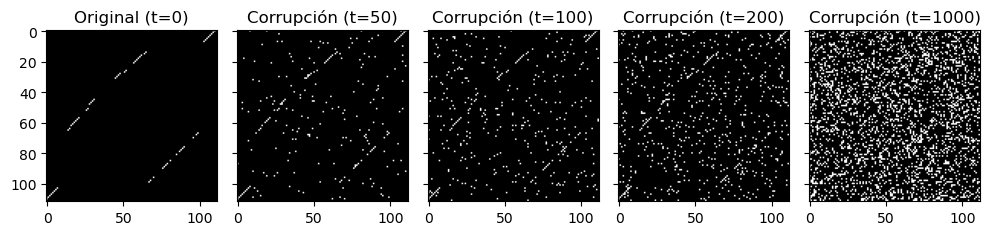

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que 'ct_filter_128' es el mapa de contacto original
# y 'forward_diffusion_sample' está definido

def plot_corruption_steps(x0_tensor, T, alphas_bar):
    fig, axes = plt.subplots(1, 5, figsize=(10, 5), sharex=True, sharey=True)
    
    # Paso de tiempo temprano (por ejemplo, t=0)
    xt_early = forward_diffusion_sample(x0_tensor, t=0, alphas_bar=alphas_bar)
    ax_early = axes[0] # Correcto: Accede al primer subplot
    
    ax_early.imshow(np.array(xt_early).reshape(112, 112), cmap="gray")
    ax_early.set_title("Original (t=0)")
    
    for i, t in enumerate([50,100,200,1000]):
        # Paso de tiempo tardío (por ejemplo, t=800)
        xt_late = forward_diffusion_sample(x0_tensor, t=t, alphas_bar=alphas_bar)
        
        axes[i+1].imshow(np.array(xt_late).reshape(112, 112), cmap="gray")
        axes[i+1].set_title(f"Corrupción (t={t})")
    plt.tight_layout()
    plt.show()

plot_corruption_steps((seq_ds[0]["contact"]), T, torch.Tensor(alphas_bar))

In [27]:
def p_0(xt, t, K=2):
    """
    Simula el proceso de eliminación de ruido.
    En una implementación real, esto usaría una red neuronal para predecir x0.
    """
    # Aquí se evaluaría la red neuronal (NN) para obtener la predicción de x0_hat
    # x0_hat = NN(xt, t)
    
    # Para fines de este ejercicio, usamos un valor sustituto
    # Asumimos que la forma de x0_hat es la misma que la de xt,
    # con probabilidades para cada categoría.
    
    # Ejemplo de un valor sustituto, simulando una salida de la red neuronal
    valor_sustituto = np.random.rand(*xt.shape)
    valor_sustituto = valor_sustituto / np.sum(valor_sustituto, axis=-1, keepdims=True)
    valor_sustituto = torch.tensor(valor_sustituto, dtype=torch.float32)

    return valor_sustituto